In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from molNet.rxn.general import Substance, Reaction, ReactionSet
initiator=Substance(name="I")
initiator_radical=Substance(name="Ir")
monomer=Substance(name="M")
poly_radical=Substance(name="R")
polymer=Substance(name="P")

initiation1=Reaction(k=0.001834,reactants=[(initiator,1)],products=[(initiator_radical,2)])
initiation2=Reaction(k=49876,reactants=[(initiator_radical,1),(monomer,1)],products=[(poly_radical,1)])

grow=Reaction(k=49876,reactants=[(poly_radical,1),(monomer,1)],products=[(poly_radical,1)])

termi1 = Reaction(k=1.414*10**9,reactants=[(poly_radical,2)],products=[(polymer,1)])
#termi1 = Reaction(k=10,reactants=[(poly_radical,2)],products=[(polymer,2)])

rs = ReactionSet()
rs.add_reaction(initiation1)
rs.add_reaction(initiation2)
rs.add_reaction(grow)
rs.add_reaction(termi1)
rs

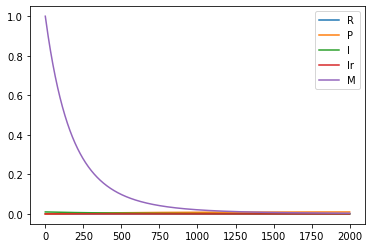

In [34]:
T=2000
dT=0.1
ts=np.arange(0,T,dT)
diff_eq,data = rs.get_differential_function()

conc_map={initiator:0.01,initiator_radical:0,monomer:1,poly_radical:0,polymer:0}
conc=[conc_map[r] for r in data['substances']]

ys = odeint(diff_eq,conc,ts,hmax=dT)

for i in range(ys.shape[1]):
    plt.plot(ts[:ys.shape[0]],ys[:,i],
                 label=data['substances'][i]
                 )
plt.legend()


In [35]:
ys

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e-02, 0.00000000e+00,
        1.00000000e+00],
       [1.13876926e-07, 1.77648860e-06, 9.99816621e-03, 7.35700276e-10,
        9.99440885e-01],
       [1.13866485e-07, 3.60998923e-06, 9.99633271e-03, 7.35985940e-10,
        9.98869751e-01],
       ...,
       [1.82013269e-08, 9.74457295e-03, 2.55415230e-04, 5.43042012e-09,
        3.45901720e-03],
       [1.81996579e-08, 9.74461979e-03, 2.55368392e-04, 5.43006423e-09,
        3.45860954e-03],
       [1.81979891e-08, 9.74466662e-03, 2.55321561e-04, 5.42970831e-09,
        3.45820197e-03]])